### Task 1: Introduction 

In [1]:
# Standard imports
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
from pylab import rcParams
import seaborn as sns; sns.set(style="ticks", color_codes=True)
rcParams['figure.figsize'] = 15, 10

warnings.simplefilter('ignore')

### Task 2: Dataset Exploration

In [2]:
# Load the data

df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.describe()

,cement,slag,ash,water,splast,coarse,fine,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Task 3: Preprocessing the Data

In [4]:
# Specify the features and target of interest
features = [
    "cement","slag","ash","water","splast","coarse","fine","age"
]
target = 'strength'

# Get the X and y data from the DataFrame
X = df[features]
y = df[target]

### Task 4: Pairwise Scatterplot

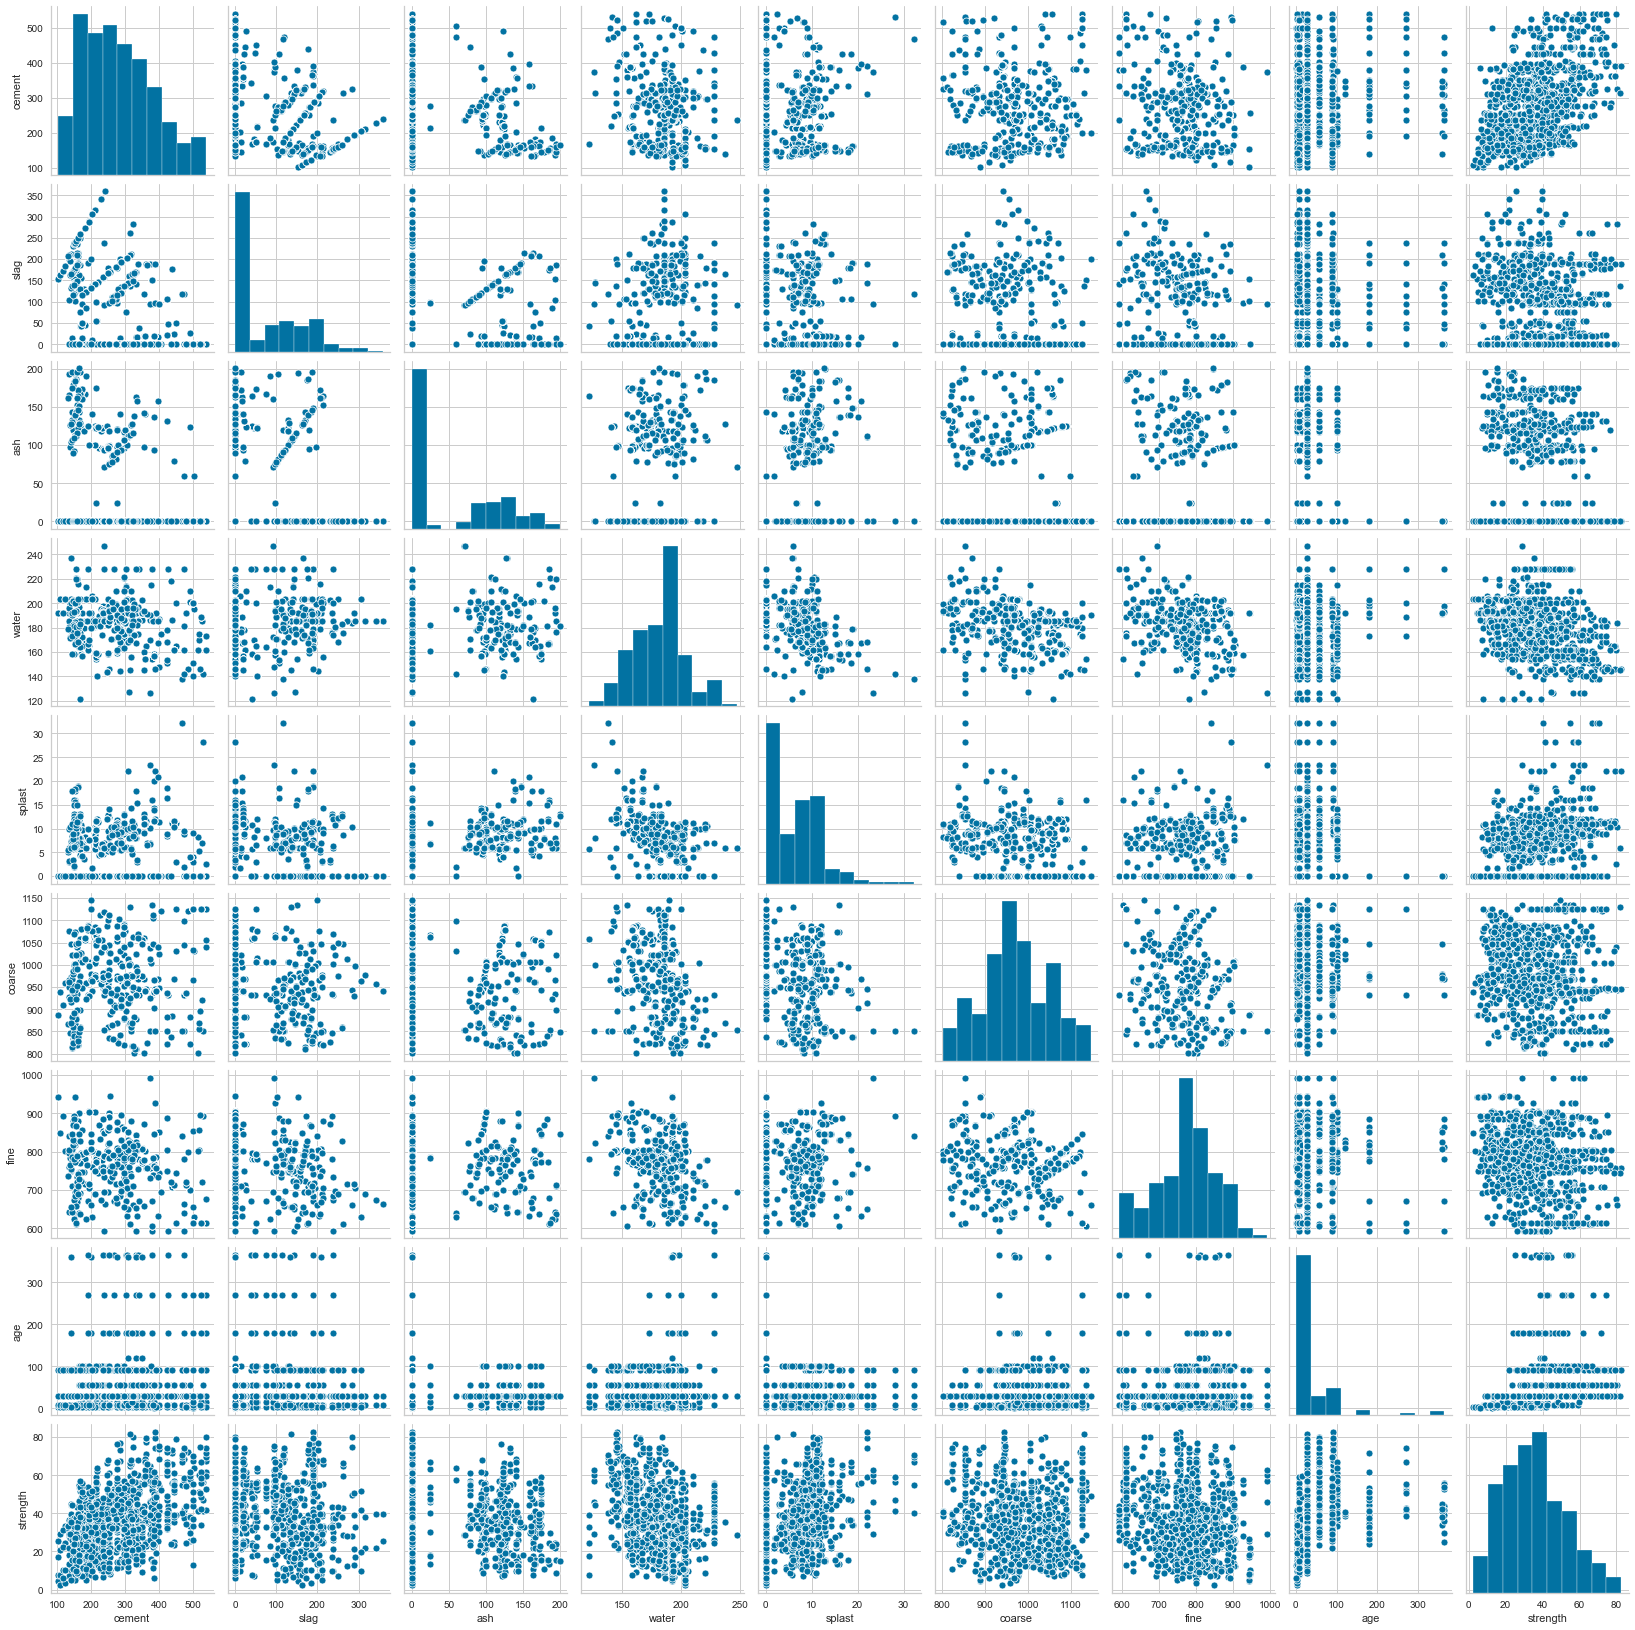

In [8]:
sns.pairplot(df);

### Task 5: Feature Importances

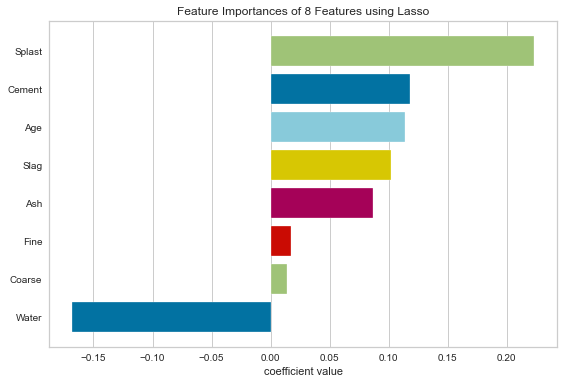

In [10]:
#from yellowbrick.features.importances import FeatureImportances (outdated)
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(Lasso(), ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

#before any of the ml model part starts, we need to know which features we should fed our algorithm with. bcs more feature
#that model contains, more sensitive it is. and therefore more sensitive to errors such as variance. common approach to 
#eliminating features or combination of features and re-evaluate model to see if model doing better in cv.

#in sklearn dt models and rf models, gradient boosting (ensemble models basically) have feature importance attr. other than
#that its not very common in sklearn. on the other hand yellowbrick has feature importance also. its for drawing relative imp
#also sklearn has this just for classification algos, however yellowbrick has this for feature regression models as well.


#good thing about FeatureImportances is u dont have to instantiate yr model (lasso) outside as ls=Lasso() and put ls in 
#FeatureImportnaces, we can do it in 1 step. then we need to define axis, and labels. what is "raltive" means? it show the
#true magnitude of the coef (feature) rather than relative one on f.importance plot. relative=False is the way.

#these vals on the plot are "absolute coefs" bcs we set relative=False as we said it earlier. wrt other coef vals. larger 
#coefs more important outcomes for the final model.

### Task 6: Target Visualization

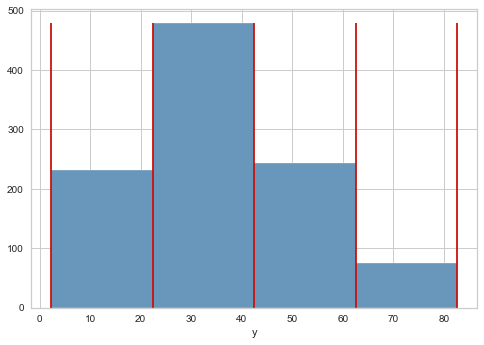

In [11]:
from yellowbrick.target import BalancedBinningReference

# Instantiate the visualizer
visualizer = BalancedBinningReference()

visualizer.fit(y)          # Fit the data to the visualizer
visualizer.poof()          # Draw/show/poof the data

#so lets talk about target visualizer.visaully describing dependent var, its concrete str for our case. in yellowbrick there
#is balancedbinningreference func. it generates a hist, showing the recommended value points to bin the data evenly. here is
#more detail.

#in real world, ml problems suffer from curse of dimensionality, that means, we have fewer tr instances than we'd like. and
#predictive signal? is often distributed and unpredictable across many dif features. sts when our target var is cont, there
#simply arent enough isntances/samples to predict this vals with enough precision that regression requires. in this case, sts
#we could turn reg problem into classification problem by binning cont vals into dummy classes.

#now,we re going to use this balance binning reference visualizer, to select optimal bins. and generate hist with our target
#var in y axis. point to keep in mind is that, we ll not be converting our problem into a classification prbolem since we've
#enough tr data for this problem. this is just an "if case" if u dont have enough tr data and u have reg problem. bin our 
#targets by creating dummy classes.


#as u can we just instantiate and fit our target var (y) and visualizer.show() thats all. Assume we experiencing "curse of
#dimensionality" then with this method, we can just use "balancedbinningreference" to bin our target into this 4 clusters.
#and these are optimal vals, number required on each of the dummy classes. ez way to convert tricky reg problems into much
#simpler classification problem.

### Task 7: Evaluating Lasso Regression

In [12]:
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split

In [13]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

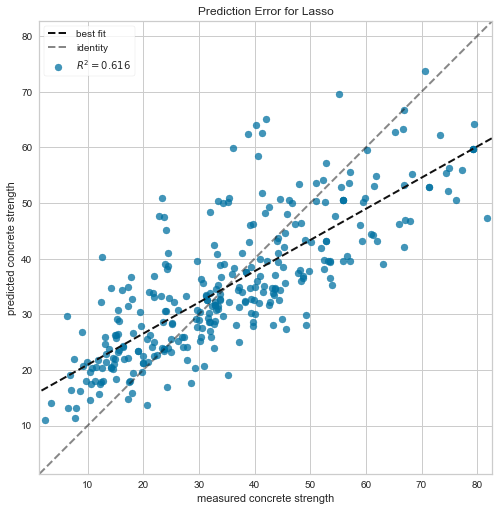

In [14]:
visualizer = PredictionError(Lasso(), size=(800, 600))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Call finalize to draw the final yellowbrick-specific elements
visualizer.finalize()

# Get access to the axes object and modify labels
visualizer.ax.set_xlabel("measured concrete strength")
visualizer.ax.set_ylabel("predicted concrete strength");


#when we re evaluating on regressor, like we did w lasso_reg, there are few imp questions we should ask ourselves.
#1.how well model describes the tr data.
#2.how well model describes out-of-sample data (test data)
#there are few ways to evaluate this. goodness-of-fit or randomness of residuals, or prediction error plot. lets start w
#prediction error plot. 

#prediction error plot: this plot shows the actual targets, against the predicted values generated by our model. now we can 
#see how much of a variance we have within the model. ds and ml practitioners diagnose reg models using this plot. 45 degree 
#line where the pred exactly matches a model?? lets see it in practice.

#this is 1 way (prediction error plot way) to evaluate our linreg model. fit the model on tr set and predict on test set
#(its .score() on yellowbrick) we see 45 degree line and bold black line as line of best fit (lasso reg model) w our r2 val.
#again i repeat myself, this is one way, using pred error plot, to eval linreg model (lasso reg to be precise.)

#now its time to visualize our variance on our test set errorrs, look at the residuals and getting insight from our plot.

### Task 8: Visualization of Test-set Errors

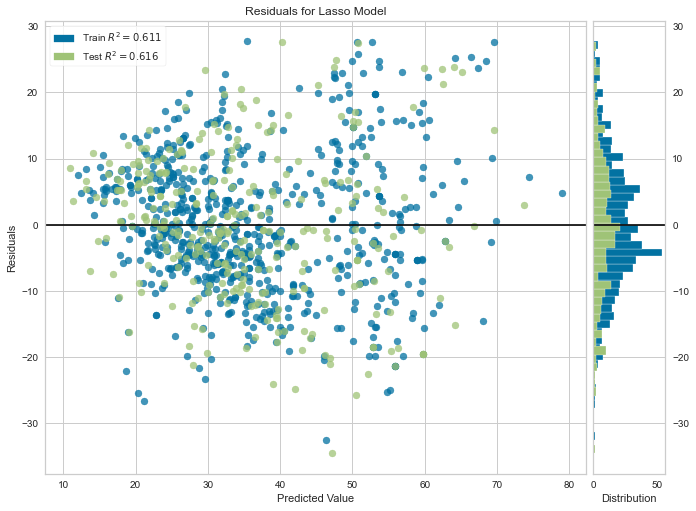

In [18]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(Lasso(), size=(800,600))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

#errors(residuals) and ways to mitigate them. one way of visualizing errors is looking at the residuals and plotting them.
#this plot helps us detect regions in our data that is susceptible to more/less error. this plot is called as "residualsplot"

#common use of res plot, is to analyze the variance of the error after regressor. so if the points are randomly dispersed
#around the horizontal axis(0, black line) it means linreg model usually approp for the data, otherwise nonlinear model is 
#better. in our case,again, we see fairly random uniform dist of the residual against the target so it seems to indicate that
#lin model could work well. we also see from hist that, errors are normally dist (kinda) which is (generally) also indicates
#well fitted model.

In [19]:
X_train.head()

,cement,slag,ash,water,splast,coarse,fine,age
585,290.20,193.50,0.00,185.70,0.00,998.2,704.30,28
469,194.68,0.00,100.52,170.17,7.48,998.0,901.80,100
858,322.00,149.00,0.00,186.00,8.00,951.0,709.00,28
237,213.76,98.06,24.52,181.74,6.65,1066.0,785.52,56
741,480.00,0.00,0.00,192.00,0.00,936.0,721.00,28


### Task 9: Cross Validation Scores

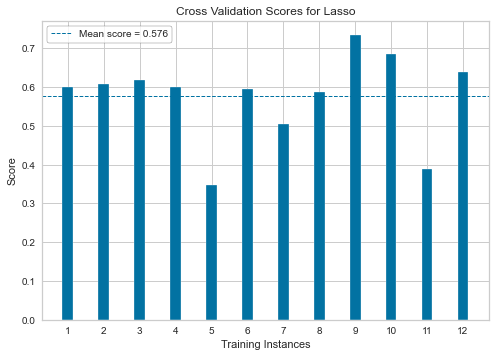

In [20]:
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

# Create a new figure and axes
_, ax = plt.subplots()

cv = KFold(12)

oz = CVScores(
    Lasso(), ax=ax, cv=cv, scoring='r2')

oz.fit(X_train, y_train)
oz.poof()

#we generally check our model is optimal or not by its f1 score or precision or recall or accuracy score in classification.
#we look at r2 val for regression. we can also look error for regression (rmse,mae). in real world, data splitted unevenly,
#and our fitted models might work good on some sections of the data, and doesnt work well for other sections. this is an
#issue. way to see how well our model performs on dif subsections of data we can use yellowbricks again. yellowbricks cvscore
#visualizer is a good tool. cv uses dif subset of data as tr/test and we can see each of their performance.

#now we can see, how our models work on dif folds/subsets of data.our mean score is 0.57 and some folds have r2 vals nearly
#close to 0.3 which is very poor. u need to beware of this. u need to deal w this issues before modelling phase. but its
#kinda out of scope for now. this is just to show the tool, how to deal w the problem is another thing. sadly.

### Task 10: Learning Curves

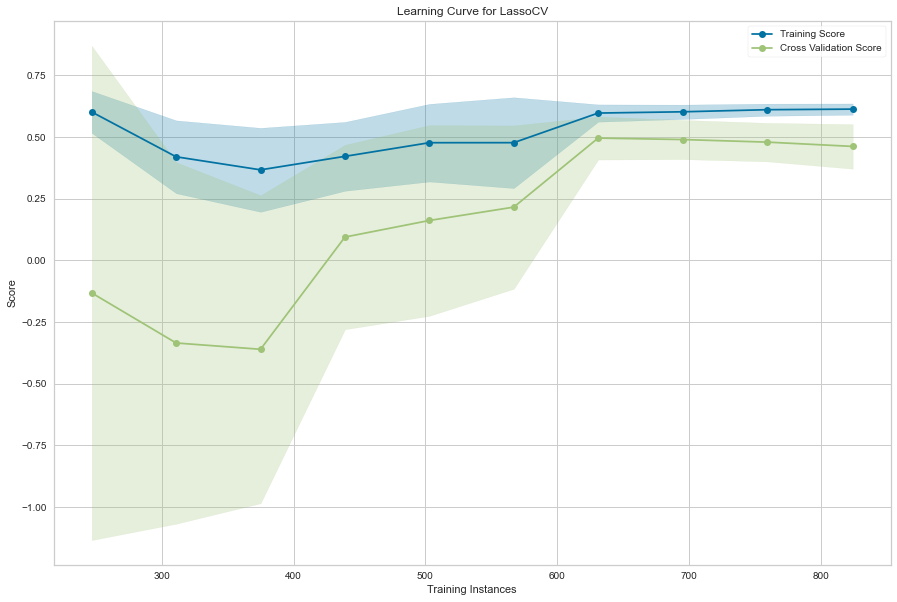

In [23]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import LassoCV
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Create the learning curve visualizer
sizes = np.linspace(0.3, 1.0, 10)

# Create the learning curve visualizer, fit and poof
viz = LearningCurve(LassoCV(), train_sizes=sizes, scoring='r2')
viz.fit(X, y)
viz.poof()

#how learning curves help our model eval steps.learning curves shows the rship btw tr score vs cross-validated test score for
#a estimator(model). this vis typically shows 2 things.
#1.how much an estimator benefits from more data, for ex, do we have enough data or will the model get better if we've more
#2.we can use this vis if the estimator more sensitive to error due to variance OR error due to bias. so we can use this to
#diagnose btw 2 cases.

#i have couple problems, that i need to investigate, we dont use cv parameter of lassocv, its none by default. so its
#meaningless. and our X data has around 1k row thus from tr-size=0.3 to 1  our tr size cant be lower than 300 which it is.
#i guess learningcurve split data automatically. u dont need to do x_train,y_train etc. just fit will do it on background.
#nonetheless its for testing better data amount for splits, and also bias/variance rship visualization. thats what i get.

#we ll also talk about alpha which could pretty much affect this plot.

In [26]:
X.shape

(1030, 8)

### Task 11:  Hyperparameter Tuning

The AlphaSelection Visualizer demonstrates how dif vals of alpha influence model slc during the regularization of linear models

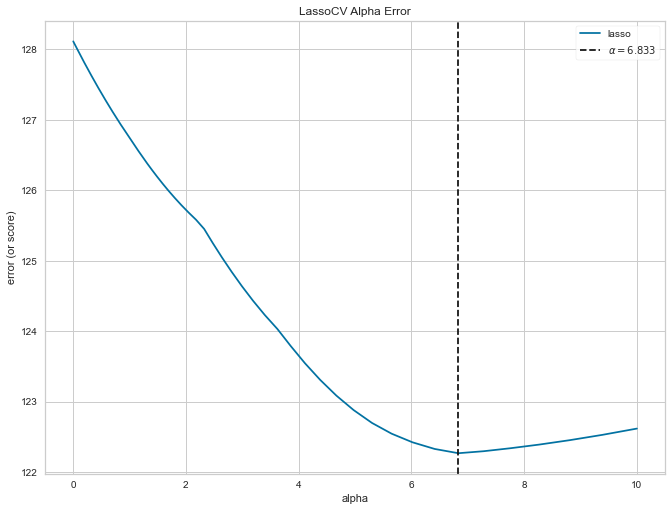

In [27]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model, size=(800,600))

visualizer.fit(X, y)
g = visualizer.poof()

#this alpha is our alpha from ridge & lasso regularization. this can be changed ofc. there're' other hparams for other models
#type of kernel for svc, gamma parameter and many others for many models etc.these params cant be learned thus its called 
#"hparam". regularization used to lower model complexity and lower chance to overfit. higher alpha->less complex model ->
#could underfit, harder to overfit, increase bias, decrease variance. all mean same thing. we ll choose an opt alpha that
#error of underfit and overfit minimized in both direction. alphaselection visualizer can help us with that.

#alphaselection shows us how dif alphas influence model selection during reg of linearmodels. we can see that our optimal
#alpha is around 6.83. also we could compare lasso,ridge,elasticnet. however its for us to learn for later. i guess we could
#add sth like RidgeCV and ElasticNetCV or sth and compare them side by side. also we could see that if regularization is
#needed here, if our error decreased or not etc.